In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the data into content directory
!unzip /content/drive/MyDrive/Research\ project/Real.zip

In [38]:
#installing augmentor package for data augmentation
!pip3 install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Installing packages
!pip install cv2 
!pip install glob 
!pip install shutil
!pip install os
!pip install ntpath
!pip install matplotlib
!pip install numpy==1.21.6
!pip install Augmentor==0.2.10

In [39]:
#importing required libraries
import cv2
from glob import glob
import shutil 
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import Augmentor

In [8]:
#creating necessary directories in the tree structure followed for data pre-processsing
os.mkdir('/content/Data')
os.mkdir('/content/Data/Male')
os.mkdir('/content/Data/Female')
os.mkdir('/content/Data/male2k')
os.mkdir('/content/data')
os.mkdir('/content/data/train')
os.mkdir('/content/data/val')
os.mkdir('/content/data/train/Male')
os.mkdir('/content/data/train/Female')
os.mkdir('/content/data/val/Male')
os.mkdir('/content/data/val/Female')

In [9]:
#selecting raw data 
directory= glob('/content/Real/*.BMP')

In [10]:
#total number of images
len(directory)

6000

In [11]:
#Defining male and female fingerprint class directory
maledir='/content/Data/Male/'
femdir='/content/Data/Female/'

In [12]:
#splitting the images into male and female classes using each filename
#bmp images are converted into jpg format
for i in directory:
    filename=i.split('/')[-1].split('.')[0]
    img=cv2.imread(i)
    gender=i.split('/')[-1].split('__')[-1].split('_')[0]
    if gender=='M':
        cv2.imwrite(maledir+filename+'.jpg',img)
    else:
        cv2.imwrite(femdir+filename+'.jpg',img)

In [13]:
#example of filename
filename

'170__M_Right_little_finger'

In [14]:
male_images=glob('/content/Data/Male/*.jpg')
print(f'No. of images in Male class: {len(male_images)}')

No. of images in Male class: 4770


In [15]:
fem_images=glob('/content/Data/Female/*.jpg')
print(f'No. of images in Female class: {len(fem_images)}')

No. of images in Female class: 1230


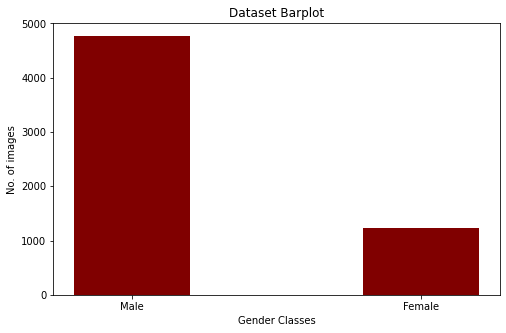

In [16]:
# creating the dataset
data = {'Male':len(male_images), 'Female':len(fem_images)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Gender Classes")
plt.ylabel("No. of images")
plt.title("Dataset Barplot")
plt.show()

In [17]:
#selecting 2000 images from Male class
male_dir = glob("/content/Data/Male/*.jpg")
male_dir_2k='/content/Data/male2k/'
for i in male_dir[:2000]:
    filename = ntpath.basename(i)
    shutil.move(i,male_dir_2k+filename)

In [18]:
len(glob(male_dir_2k + '*.jpg'))

2000

In [19]:
#Data augmentation function
def augMent(nImageToGenerate, input_path):
  p = Augmentor.Pipeline(source_directory=input_path)
  p.set_save_format(save_format="auto")
  p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
  p.zoom(probability=0.4, min_factor=1.1, max_factor=1.3)
  p.flip_left_right(probability=0.3)
  p.flip_top_bottom(probability=0.3)
  p.sample(nImageToGenerate)

  os.system('mv '+input_path+'output/*.* '+input_path)
  os.system('rm -r '+input_path+'output')

In [20]:
#Using data augmentation increasing class size to 2000 each
imgNUM=2000
for x,y in [(i,len(os.listdir(i))) for i in [femdir,male_dir_2k]]:
    print(y)
    if (imgNUM-y)>0:
     print("hh")
     augMent(input_path=x, nImageToGenerate=(imgNUM-y))

1230
hh
Initialised with 1230 image(s) found.
Output directory set to /content/Data/Female/output.

Processing <PIL.Image.Image image mode=RGB size=96x103 at 0x7F2131C6F460>: 100%|██████████| 770/770 [00:06<00:00, 112.28 Samples/s]

2000


In [21]:
len(glob(male_dir_2k+ '*.jpg'))

2000

In [22]:
len(glob(femdir+ '*.jpg'))

2000

In [23]:
#splitting data into training and validation set (80:20)
train_male_dir='/content/data/train/Male/'
train_fem_dir='/content/data/train/Female/'
val_male_dir='/content/data/val/Male/'
val_fem_dir='/content/data/val/Female/'

In [24]:
male_dir=glob(male_dir_2k + '*.jpg')
len(male_dir)

2000

In [25]:
for i in male_dir[:1600]:
    filename = ntpath.basename(i)
    shutil.move(i,train_male_dir+filename)

In [26]:
male_dir=glob(male_dir_2k + '*.jpg')
len(male_dir)

400

In [27]:
for i in male_dir[:400]:
    filename = ntpath.basename(i)
    shutil.move(i,val_male_dir+filename)

In [28]:
fem_dir=glob(femdir + '*.jpg')
len(fem_dir)

2000

In [29]:
for i in fem_dir[:1600]:
    filename = ntpath.basename(i)
    shutil.move(i,train_fem_dir+filename)

In [30]:
fem_dir=glob(femdir + '*.jpg')
len(fem_dir)

400

In [31]:
for i in fem_dir[:400]:
    filename = ntpath.basename(i)
    shutil.move(i,val_fem_dir+filename)

In [32]:
print(f'No. of images in Male training class: {len(glob(train_male_dir+"*.jpg"))}') 
print(f'No. of images in Male validation class: {len(glob(val_male_dir+"*.jpg"))}') 
print(f'No. of images in Female training class: {len(glob(train_fem_dir+"*.jpg"))}') 
print(f'No. of images in Female validation class: {len(glob(val_fem_dir+"*.jpg"))}') 

No. of images in Male training class: 1600
No. of images in Male validation class: 400
No. of images in Female training class: 1600
No. of images in Female validation class: 400


In [33]:
#zipping the final data folder
!zip -r /content/data.zip /content/data/

  adding: content/data/ (stored 0%)
  adding: content/data/train/ (stored 0%)
  adding: content/data/train/Female/ (stored 0%)
  adding: content/data/train/Female/Female_original_48__F_Right_thumb_finger.jpg_d1874c1a-875f-4305-be79-445f3ca10a71.jpg (deflated 4%)
  adding: content/data/train/Female/550__F_Right_ring_finger.jpg (deflated 3%)
  adding: content/data/train/Female/Female_original_508__F_Left_index_finger.jpg_4ba4ad67-bda0-4bec-8080-829eb4b3d7f9.jpg (deflated 10%)
  adding: content/data/train/Female/479__F_Left_middle_finger.jpg (deflated 4%)
  adding: content/data/train/Female/536__F_Right_little_finger.jpg (deflated 3%)
  adding: content/data/train/Female/31__F_Left_middle_finger.jpg (deflated 5%)
  adding: content/data/train/Female/25__F_Left_ring_finger.jpg (deflated 3%)
  adding: content/data/train/Female/156__F_Left_thumb_finger.jpg (deflated 3%)
  adding: content/data/train/Female/Female_original_204__F_Left_ring_finger.jpg_1331b5f7-635b-403a-98f2-3dbc2f1f6212.jpg (def

In [34]:
#copyting the data folder to drive
!cp /content/data.zip /content/drive/MyDrive/Research\ project